In [ ]:
 !pip install -q kaggle
 from google.colab import files

In [ ]:
files.upload()  #for uploading the files

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityasurvase","key":"e9f18c1700a517e8d6a9217a22e07504"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list    #to list the datasets in kaggle

ref                                                      title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide     Covid Cases and Deaths WorldWide           8KB  2023-02-01 12:22:51          10980        361  1.0              
naveenkumar20bps1137/walmart-sales-analysis              WALMART SALES ANALYSIS                   119KB  2023-03-03 18:02:11           1381         41  0.9411765        
datascientistanna/customers-dataset                      Shop Customer Data                        23KB  2023-02-07 18:42:21           9362        216  1.0              
ulrikthygepedersen/co2-emissions-by-country              CO2 Emissions                            114KB  2023-02-28 12:39:49            792         27

In [ ]:
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

100% 733M/736M [00:33<00:00, 23.8MB/s]
100% 736M/736M [00:33<00:00, 23.0MB/s]


In [ ]:
#Commands are used to extract the downloaded dataset archive file

import zipfile
zip_ref=zipfile.ZipFile('/content/eye-diseases-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#importing required libraries


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import tensorflow as tf
%matplotlib inline

In [ ]:
import tensorflow_hub as hub
import os

In [ ]:
# To create a list of image file paths and their corresponding labels based on the directory structure of the "dataset" folder.

path = '/content/dataset'
address = []
l1 = os.listdir(path)
print(l1)
for i in l1:
  l2 = os.listdir(path +'/'+ i)
  print(l2)
  for n in l2:
    address.append([path+'/'+i+'/'+n,i])

['glaucoma', 'diabetic_retinopathy', 'normal', 'cataract']
['1352_right.jpg', '1494_left.jpg', '1227_right.jpg', '_403_4411201.jpg', '1959_right.jpg', '_282_8545700.jpg', '_16_2996330.jpg', '_141_1074732.jpg', 'Glaucoma_031.png', '1280_left.jpg', '_108_9870998.jpg', '_41_7018471.jpg', 'Glaucoma_041.png', '_257_1527283.jpg', '_249_6890690.jpg', '_102_5502806.jpg', '1393_right.jpg', '1967_right.jpg', '1434_left.jpg', '_161_5855059.jpg', '2063_left.jpg', '_15_1523968.jpg', '1288_right.jpg', '_223_2293487.jpg', '_36_9662569.jpg', '167_left.jpg', '_346_7643111.jpg', '_199_7083786.jpg', '_160_6175019.jpg', '_379_852244.jpg', '_28_7928893.jpg', '_236_8014695.jpg', '_358_2954052.jpg', '1362_right.jpg', '_103_1487378.jpg', '1470_left.jpg', 'Glaucoma_067.png', '_198_4839828.jpg', '1412_right.jpg', 'Glaucoma_023.png', '_402_8604384.jpg', '_2_8820241.jpg', '_321_9678485.jpg', 'Glaucoma_064.png', '_307_9597397.jpg', '1297_left.jpg', '_160_3285565.jpg', '_263_9132183.jpg', '_48_3684538.jpg', '_181_5

In [ ]:
#Creating DataFrame

df = pd.DataFrame(address,columns = ['address', 'group'])
df.head()

,address,group
0,/content/dataset/glaucoma/1352_right.jpg,glaucoma
1,/content/dataset/glaucoma/1494_left.jpg,glaucoma
2,/content/dataset/glaucoma/1227_right.jpg,glaucoma
3,/content/dataset/glaucoma/_403_4411201.jpg,glaucoma
4,/content/dataset/glaucoma/1959_right.jpg,glaucoma


In [ ]:
df['group'].value_counts()

diabetic_retinopathy    1098
normal                  1074
cataract                1038
glaucoma                1007
Name: group, dtype: int64

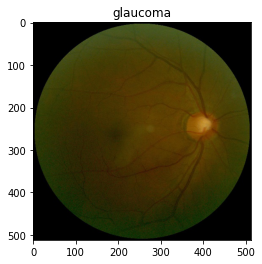

In [ ]:
#To display the first image in the dataset

img = plt.imread(df['address'][0])
plt.title(df['group'][0])
plt.imshow(img)

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
df['label'] = df['group'].map({'cataract': 1,  'normal' : 0 , 'diabetic_retinopathy' : 2,'glaucoma': 3})

In [ ]:
len(df)

4217

In [ ]:
df.head()

,address,group,label
0,/content/dataset/glaucoma/1352_right.jpg,glaucoma,3
1,/content/dataset/glaucoma/1494_left.jpg,glaucoma,3
2,/content/dataset/glaucoma/1227_right.jpg,glaucoma,3
3,/content/dataset/glaucoma/_403_4411201.jpg,glaucoma,3
4,/content/dataset/glaucoma/1959_right.jpg,glaucoma,3


In [ ]:
# To create a list of boolean labels for each eye disease class in the dataset.

unique = np.unique(df['label'])
print(unique)
boolean_labels = [label == unique for label in df['label']]
boolean_labels[:2]

[0 1 2 3]


[array([False, False, False,  True]), array([False, False, False,  True])]

In [ ]:
X = df['address']
y = boolean_labels

In [ ]:
NUM_IMAGES = len(df)


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X[:NUM_IMAGES],
                                                 y[:NUM_IMAGES],
                                                 test_size = 0.20,
                                                 random_state =42,
                                                 shuffle =True,
                                                 stratify = y[:NUM_IMAGES])

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.20,random_state = 42)

In [ ]:
len(X_train), len(X_val), len(X_test)

(2698, 675, 844)

In [ ]:
#To preprocess images in the eye diseases dataset.

img_size = 224
def process_images(image_path, img_size = img_size):

  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels = 3)
  img = tf.image.convert_image_dtype(img,tf.float32)
  img = tf.image.resize(img, size = [img_size,img_size])

  return img

In [ ]:
# To preprocess an image and its corresponding label in the eye diseases dataset.

def get_image_label(image_path, label):
  image = process_images(image_path)

  return image,label

In [ ]:
# To creates a TensorFlow dataset from a tensor of image paths X_test.

tf.data.Dataset.from_tensor_slices(tf.constant(X_test))

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [ ]:
#To create batches

batch_size = 32

def create_data_batches(X,y=None,batch_size=batch_size,valid_data=False,test_data=False):
  if test_data:
    print('Creating test data batches....')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_images).batch(batch_size)
    return data_batch

  elif valid_data:
    print('Creating valiation data batches....')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    print("Creating training data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data = data.shuffle(buffer_size = len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(batch_size)
  return data_batch

In [ ]:
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data = True)

Creating training data batches....
Creating valiation data batches....


In [ ]:
test_data = create_data_batches(X_test,test_data = True)

Creating test data batches....


In [ ]:
train_data.element_spec,val_data.element_spec,test_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 4), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 4), dtype=tf.bool, name=None)),
 TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None))

In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.bool, name=None))>

In [ ]:
#Importing libraries

import numpy as np
import pandas as pd
from keras.layers import Dense, Flatten, Conv2D
from keras.layers import BatchNormalization, MaxPool2D, Dropout
from keras import Sequential

In [ ]:
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.models import Model

In [ ]:
#The "img_size" variable specifies the target size (height and width) of the preprocessed images.

img_size = 224

input_size = [None,img_size,img_size,3]

output_size = len(unique)

model_url = 'https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/classification/5'
#mobilenet_b0

In [ ]:
#The function create_model takes the input_size, output_size, and model_url as input arguments, and returns a compiled Keras model. The input_size defines the shape of the input tensor

def create_model(input_size = input_size, output_size = output_size, model_url = model_url):
  model = tf.keras.Sequential([#data_augmentation,
                              hub.KerasLayer(model_url),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(units = 256,activation ='relu'),
                              tf.keras.layers.Dense(units = 256,activation ='relu'),
                              tf.keras.layers.Dense(units = output_size, activation ='softmax')])
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
  model.build(input_size)

  return model

In [ ]:
model = create_model()
model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              2052577   
                                                                 
 flatten (Flatten)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 256)               256512    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 2,375,909
Trainable params: 323,332
Non-trainable params: 2,052,577
_________________________________________________________________


In [ ]:
%load_ext tensorboard

In [ ]:
#Tensorflow callback

import datetime

def create_tensorboard_callback():

  logdir = os.path.join('/content/logs', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 3)

In [ ]:
epoc =20 #@param {type:"slider", min:20,max:1000}

In [ ]:
tensorboard = create_tensorboard_callback()

history = model.fit(x=train_data,
            epochs = epoc,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard,early_stopping])

Epoch 1/20
85/85 [==============================] - 40s 310ms/step - loss: 0.5856 - accuracy: 0.7754 - val_loss: 0.4680 - val_accuracy: 0.8074
Epoch 2/20
85/85 [==============================] - 20s 236ms/step - loss: 0.3845 - accuracy: 0.8532 - val_loss: 0.4148 - val_accuracy: 0.8341
Epoch 3/20
85/85 [==============================] - 22s 254ms/step - loss: 0.3070 - accuracy: 0.8803 - val_loss: 0.4119 - val_accuracy: 0.8415
Epoch 4/20
85/85 [==============================] - 19s 226ms/step - loss: 0.2724 - accuracy: 0.8933 - val_loss: 0.3331 - val_accuracy: 0.8770
Epoch 5/20
85/85 [==============================] - 23s 276ms/step - loss: 0.2456 - accuracy: 0.8996 - val_loss: 0.3652 - val_accuracy: 0.8533
Epoch 6/20
85/85 [==============================] - 20s 242ms/step - loss: 0.2332 - accuracy: 0.9021 - val_loss: 0.2842 - val_accuracy: 0.8904
Epoch 7/20
85/85 [==============================] - 22s 262ms/step - loss: 0.2056 - accuracy: 0.9159 - val_loss: 0.3206 - val_accuracy: 0.8711

In [ ]:
 tf.keras.models.save_model(model,'my_model2.hdfs')

In [ ]:
model.save('/content/model/mobileNet.h5')

In [ ]:
model = tf.keras.models.load_model('/content/model/mobileNet.h5',custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
y_preds = model.predict(test_data,verbose = 1)

27/27 [==============================] - 7s 223ms/step


In [ ]:
def get_pred_label(prediction_probabilities):
  """
   Turns an array of prediction probabilities into a label.
  """
  return unique[np.argmax(prediction_probabilities)]

In [ ]:
custom_pred_labels = [get_pred_label(y_preds[i]) for i in range(len(y_preds))]

In [ ]:
custom_test = [get_pred_label(y_test[i]) for i in range(len(y_test))]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
confusion_matrix(custom_test, custom_pred_labels)

array([[164,   3,   8,  40],
       [  3, 187,   0,  18],
       [  6,   0, 212,   2],
       [ 22,   1,   2, 176]])

In [ ]:
#Displaying the results


print(accuracy_score(custom_test,custom_pred_labels))
print(precision_score(custom_test,custom_pred_labels,average = None))
print(recall_score(custom_test,custom_pred_labels, average = None))

0.8755924170616114
[0.84102564 0.97905759 0.95495495 0.74576271]
[0.7627907  0.89903846 0.96363636 0.87562189]


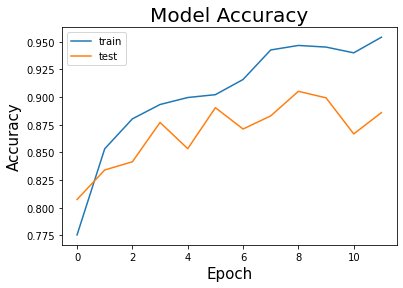

In [ ]:
# Summarize history for accuracy:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

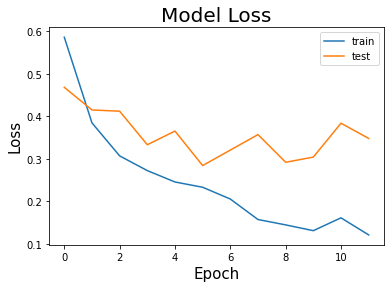

In [ ]:
# summarize history for loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
Models=['efficientnet_B0','Incepation_V3','Resnet50','mobilenet']
accuracy_score=[90.87,78.19,80.23,87.55]

<AxesSubplot:>

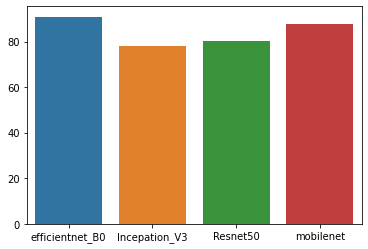

In [ ]:
import seaborn as sns
sns.barplot(x=Models,y=accuracy_score)